# Downloading Data
## Working with CSV files
1. Parsing the CSV File Headers: Use the `next` function to read line by line. Here, passing the first line of this csv file to the header to know what information each columns. 

In [2]:
import csv

filename = 'data/sitka_weather_07-2018_simple.csv'

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    print(header_row)

['STATION', 'NAME', 'DATE', 'PRCP', 'TAVG', 'TMAX', 'TMIN']


2. Next, in order to extract the DATE and highest temperature data, we need to know which column they reside. 
- In this example it is clear to see that, the DATE are in the 3rd columns and highest temperatures are in the 6th columns. 
- But if the length of the first row is very long, then it is useful to use the `enumerate()` fucntion which can return both index of each item and the item itself.

In [4]:
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    for index, column_header in enumerate(header_row):
        print(index, column_header)

0 STATION
1 NAME
2 DATE
3 PRCP
4 TAVG
5 TMAX
6 TMIN


3. Extract high Temperature data and plot. Remember to do the type casting.

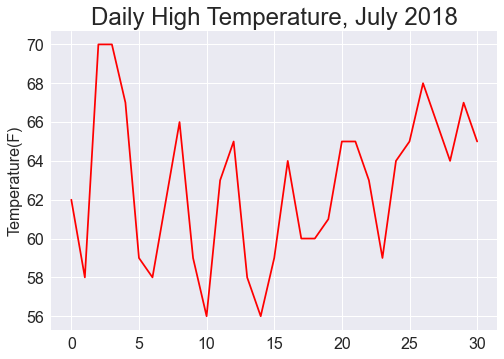

In [12]:
import matplotlib.pyplot as plt

highs = []
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    for row in reader:
        high = int(row[5])
        highs.append(high)

plt.style.use('seaborn')
fig, ax = plt.subplots()

ax.plot(highs, c = 'red')

ax.set_title("Daily High Temperature, July 2018", fontsize = 24)
ax.set_xlabel("", fontsize = 16)
ax.set_ylabel("Temperature(F)", fontsize = 16)

ax.tick_params(axis='both', which='major',labelsize=16)
plt.show()

4. Extract the Dates and plot.
- Cast from `str` to date object using the `strptime` method.
- The 1st argument is a stirng and the second argument is the format of the resulting date object.
- Apply the `fig.autofmt_xdate()` method so the dates on the x-axis don't overlap.

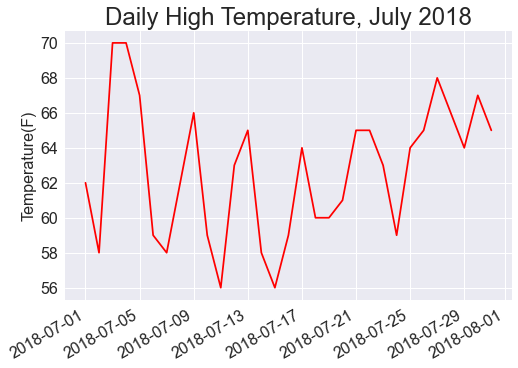

In [15]:
from datetime import datetime
highs = []
dates = []
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    for row in reader:
        high = int(row[5])
        date = datetime.strptime(row[2], '%Y-%m-%d')
        highs.append(high)
        dates.append(date)

plt.style.use('seaborn')
fig, ax = plt.subplots()

ax.plot(dates,highs, c = 'red')

ax.set_title("Daily High Temperature, July 2018", fontsize = 24)
ax.set_xlabel("", fontsize = 16)
fig.autofmt_xdate()
ax.set_ylabel("Temperature(F)", fontsize = 16)

ax.tick_params(axis='both', which='major',labelsize=16)
plt.show()

5. Plotting longer timeframe.

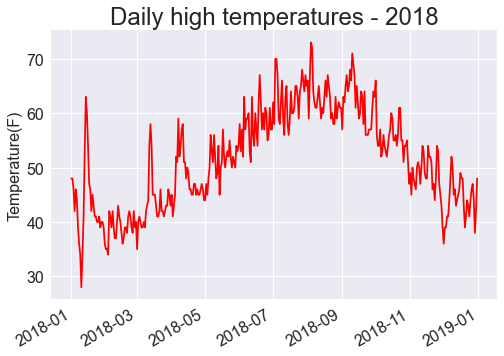

In [21]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt

filename = 'data/sitka_weather_2018_simple.csv'

highs = []
dates = []
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    for row in reader:
        high = int(row[5])
        date = datetime.strptime(row[2], '%Y-%m-%d')
        highs.append(high)
        dates.append(date)

plt.style.use('seaborn')
fig, ax = plt.subplots()

ax.plot(dates,highs, c = 'red')

ax.set_title("Daily high temperatures - 2018", fontsize = 24)
ax.set_xlabel("", fontsize = 16)
fig.autofmt_xdate()
ax.set_ylabel("Temperature(F)", fontsize = 16)

ax.tick_params(axis='both', which='major',labelsize=16)
plt.show()

6. Add low temperatures to this plot.

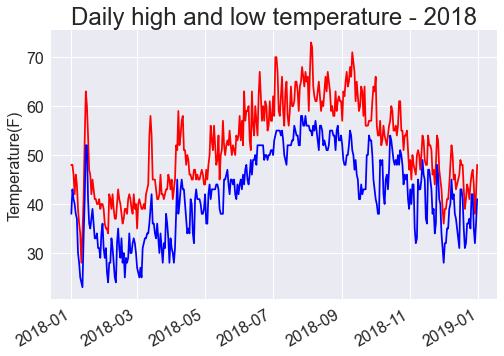

In [22]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt

filename = 'data/sitka_weather_2018_simple.csv'

highs = []
lows = []
dates = []
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    for row in reader:
        high = int(row[5])
        date = datetime.strptime(row[2], '%Y-%m-%d')
        low = int(row[6])
        highs.append(high)
        dates.append(date)
        lows.append(low)

plt.style.use('seaborn')
fig, ax = plt.subplots()

ax.plot(dates,highs, c = 'red')
ax.plot(dates,lows, c = 'blue')

ax.set_title("Daily high and low temperature - 2018", fontsize = 24)
ax.set_xlabel("", fontsize = 16)
fig.autofmt_xdate()
ax.set_ylabel("Temperature(F)", fontsize = 16)

ax.tick_params(axis='both', which='major',labelsize=16)
plt.show()

7. Range of temperature by `fill_between()` method
- The `alpha` argument controls the transparency of the color.

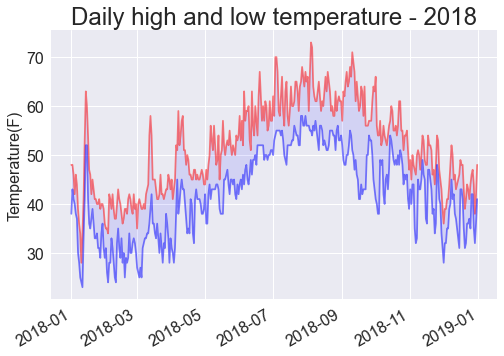

In [23]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt

filename = 'data/sitka_weather_2018_simple.csv'

highs = []
lows = []
dates = []
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    for row in reader:
        high = int(row[5])
        date = datetime.strptime(row[2], '%Y-%m-%d')
        low = int(row[6])
        highs.append(high)
        dates.append(date)
        lows.append(low)

plt.style.use('seaborn')
fig, ax = plt.subplots()

ax.plot(dates,highs, c = 'red', alpha = 0.5)
ax.plot(dates,lows, c = 'blue', alpha = 0.5)
plt.fill_between(dates, highs, lows, facecolor = 'blue', alpha = 0.1)

ax.set_title("Daily high and low temperature - 2018", fontsize = 24)
ax.set_xlabel("", fontsize = 16)
fig.autofmt_xdate()
ax.set_ylabel("Temperature(F)", fontsize = 16)

ax.tick_params(axis='both', which='major',labelsize=16)
plt.show()

8. Error checking.
- When there are missing data, do something to cope with it. eg: skip.
- Notice that: `Missing data for 2018-02-18 00:00:00.`

In [28]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt

filename = 'data/death_valley_2018_simple.csv'

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    for index, column_header in enumerate(header_row):
        print(index, column_header)

0 STATION
1 NAME
2 DATE
3 PRCP
4 TMAX
5 TMIN
6 TOBS


Missing data for 2018-02-18 00:00:00.


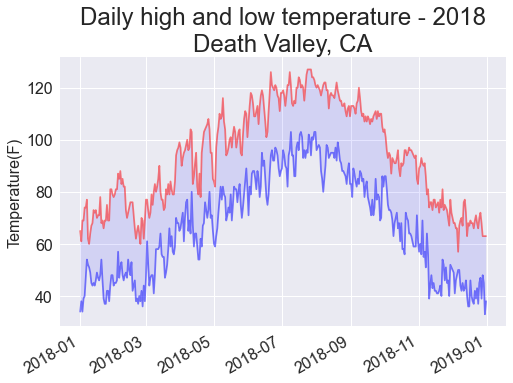

In [29]:
highs = []
lows = []
dates = []
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    for row in reader:
        date = datetime.strptime(row[2], '%Y-%m-%d')
        try:
            high = int(row[4])
            low = int(row[5])
        except ValueError:
            print(f'Missing data for {date}.')
        else:
            highs.append(high)
            dates.append(date)
            lows.append(low)

plt.style.use('seaborn')
fig, ax = plt.subplots()

ax.plot(dates,highs, c = 'red', alpha = 0.5)
ax.plot(dates,lows, c = 'blue', alpha = 0.5)
plt.fill_between(dates, highs, lows, facecolor = 'blue', alpha = 0.1)

ax.set_title("Daily high and low temperature - 2018\nDeath Valley, CA", fontsize = 24)
ax.set_xlabel("", fontsize = 16)
fig.autofmt_xdate()
ax.set_ylabel("Temperature(F)", fontsize = 16)

ax.tick_params(axis='both', which='major',labelsize=16)
plt.show()

## Try It Yourself
### 16-1. Sitka Rainfall:

In [34]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt

filename = 'data/sitka_weather_2018_simple.csv'

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    for index, column_header in enumerate(header_row):
        print(index, column_header)

0 STATION
1 NAME
2 DATE
3 PRCP
4 TAVG
5 TMAX
6 TMIN


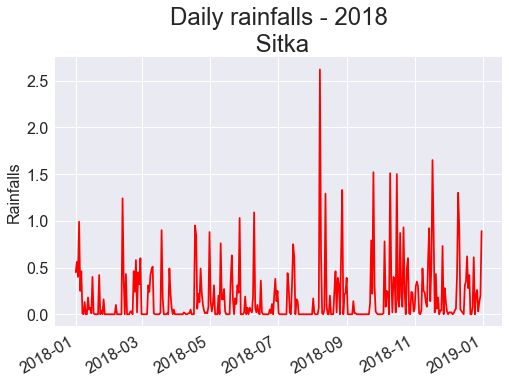

In [39]:
rainfalls = []
dates = []
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    for row in reader:
        date = datetime.strptime(row[2], '%Y-%m-%d')
        try:
            rainfall = float(row[3])
        except ValueError:
            print(f'Missing data for {date}.')
        else:
            rainfalls.append(rainfall)
            dates.append(date)

plt.style.use('seaborn')
fig, ax = plt.subplots()

ax.plot(dates,rainfalls, c = 'red')

ax.set_title("Daily rainfalls - 2018\n Sitka", fontsize = 24)
ax.set_xlabel("", fontsize = 16)
fig.autofmt_xdate()
ax.set_ylabel("Rainfalls", fontsize = 16)

ax.tick_params(axis='both', which='major',labelsize=16)
plt.show()

## 16-2. Sitka–Death Valley Comparison

Missing data for 2018-02-18 00:00:00.


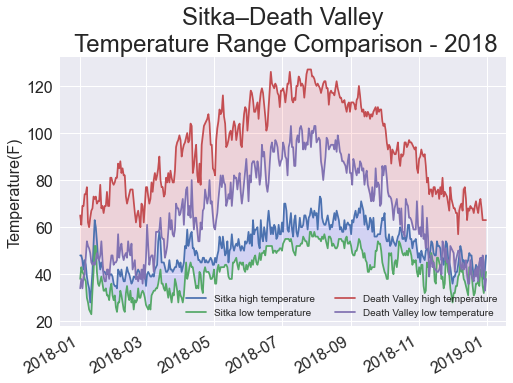

In [48]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt

filename = 'data/sitka_weather_2018_simple.csv'

highs1 = []
lows1 = []
dates1 = []
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    for row in reader:
        high = int(row[5])
        date = datetime.strptime(row[2], '%Y-%m-%d')
        low = int(row[6])
        highs1.append(high)
        dates1.append(date)
        lows1.append(low)

filename = 'data/death_valley_2018_simple.csv'

highs2 = []
lows2 = []
dates2 = []
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    for row in reader:
        date = datetime.strptime(row[2], '%Y-%m-%d')
        try:
            high = int(row[4])
            low = int(row[5])
        except ValueError:
            print(f'Missing data for {date}.')
        else:
            highs2.append(high)
            dates2.append(date)
            lows2.append(low)


plt.style.use('seaborn')
fig, ax = plt.subplots()

ax.plot(dates1,highs1, label = 'Sitka high temperature')
ax.plot(dates1,lows1, label = 'Sitka low temperature')
plt.fill_between(dates1, highs1, lows1, facecolor = 'blue', alpha = 0.1)

ax.plot(dates2,highs2, label = 'Death Valley high temperature')
ax.plot(dates2,lows2, label = 'Death Valley low temperature')
plt.fill_between(dates1, highs2, lows2, facecolor = 'red', alpha = 0.1)

ax.set_title("Sitka–Death Valley\n Temperature Range Comparison - 2018", fontsize = 24)
ax.set_xlabel("", fontsize = 16)
fig.autofmt_xdate()
ax.set_ylabel("Temperature(F)", fontsize = 16)

ax.tick_params(axis='both', which='major',labelsize=16)
plt.legend(ncol = 2)
plt.show()

## 16-3. San Francisco
- Observe the plot to conclude that temperatures in San Francisco is more like temperatures in Sitka.

Missing data for 2018-02-18 00:00:00.


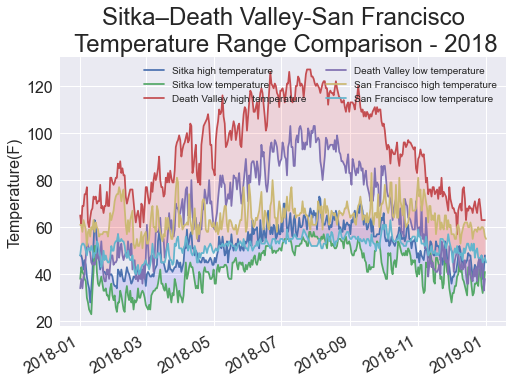

In [62]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt

filename = 'data/sitka_weather_2018_simple.csv'

highs1 = []
lows1 = []
dates1 = []
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    for row in reader:
        high = int(row[5])
        date = datetime.strptime(row[2], '%Y-%m-%d')
        low = int(row[6])
        highs1.append(high)
        dates1.append(date)
        lows1.append(low)

filename = 'data/death_valley_2018_simple.csv'

highs2 = []
lows2 = []
dates2 = []
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    for row in reader:
        date = datetime.strptime(row[2], '%Y-%m-%d')
        try:
            high = int(row[4])
            low = int(row[5])
        except ValueError:
            print(f'Missing data for {date}.')
        else:
            highs2.append(high)
            dates2.append(date)
            lows2.append(low)

filename = 'data/San_Francisco.csv'

highs3 = []
lows3 = []
dates3 = []
target = 'San Francisco downtown'.upper()
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    for row in reader:
        if target in row[1].upper():
            date = datetime.strptime(row[2], '%Y-%m-%d')
            try:
                high = int(row[4])
                low = int(row[5])
            except ValueError:
                print(f'Missing data for {date}.')
            else:
                highs3.append(high)
                dates3.append(date)
                lows3.append(low)


plt.style.use('seaborn')
fig, ax = plt.subplots()

ax.plot(dates1,highs1, label = 'Sitka high temperature')
ax.plot(dates1,lows1, label = 'Sitka low temperature')
plt.fill_between(dates1, highs1, lows1, facecolor = 'blue', alpha = 0.1)

ax.plot(dates2,highs2, label = 'Death Valley high temperature')
ax.plot(dates2,lows2, label = 'Death Valley low temperature')
plt.fill_between(dates2, highs2, lows2, facecolor = 'red', alpha = 0.1)

ax.plot(dates3,highs3, label = 'San Francisco high temperature')
ax.plot(dates3,lows3, label = 'San Francisco low temperature')
plt.fill_between(dates3, highs3, lows3, facecolor = 'red', alpha = 0.1)

ax.set_title("Sitka–Death Valley-San Francisco\n Temperature Range Comparison - 2018", fontsize = 24)
ax.set_xlabel("", fontsize = 16)
fig.autofmt_xdate()
ax.set_ylabel("Temperature(F)", fontsize = 16)

ax.tick_params(axis='both', which='major',labelsize=16)
plt.legend(ncol = 2)
plt.show()

## 16-4. Automatic Indexes

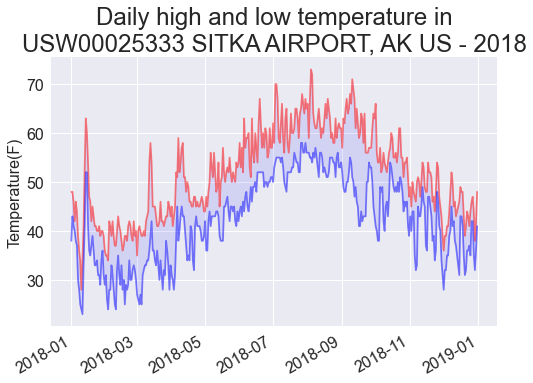

In [75]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt

filename = 'data/sitka_weather_2018_simple.csv'

highs = []
lows = []
dates = []

onece = True
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    high_index = header_row.index('TMAX')
    date_index = header_row.index('DATE')
    low_index = header_row.index('TMIN')
    
    station_index = header_row.index('STATION')
    name_index = header_row.index('NAME')
    
    for row in reader:
        if onece:
            title = row[station_index]+ ' ' + row[name_index]
            onece = False
        high = int(row[high_index])
        date = datetime.strptime(row[date_index], '%Y-%m-%d')
        low = int(row[low_index])
        highs.append(high)
        dates.append(date)
        lows.append(low)

plt.style.use('seaborn')
fig, ax = plt.subplots()

ax.plot(dates,highs, c = 'red', alpha = 0.5)
ax.plot(dates,lows, c = 'blue', alpha = 0.5)
plt.fill_between(dates, highs, lows, facecolor = 'blue', alpha = 0.1)

ax.set_title("Daily high and low temperature in\n"+title+" - 2018", fontsize = 24)
ax.set_xlabel("", fontsize = 16)
fig.autofmt_xdate()
ax.set_ylabel("Temperature(F)", fontsize = 16)

ax.tick_params(axis='both', which='major',labelsize=16)
plt.show()

Missing data on 2018-02-18 00:00:00.


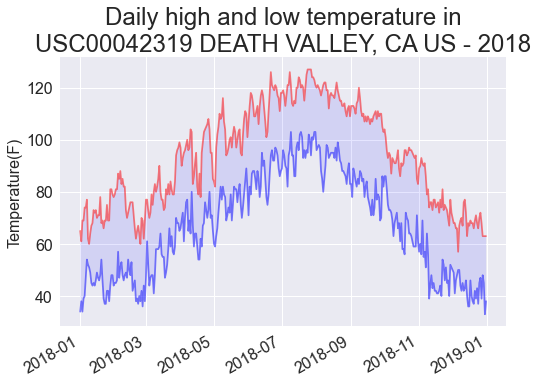

In [74]:
filename = 'data/death_valley_2018_simple.csv'

highs = []
lows = []
dates = []

onece = True
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    high_index = header_row.index('TMAX')
    date_index = header_row.index('DATE')
    low_index = header_row.index('TMIN')
    
    station_index = header_row.index('STATION')
    name_index = header_row.index('NAME')
    
    for row in reader:
        date = datetime.strptime(row[date_index], '%Y-%m-%d')
        try:
            if onece:
                title = row[station_index]+ ' ' + row[name_index]
                onece = False
            high = int(row[high_index])
            low = int(row[low_index])
        except ValueError:
            print(f'Missing data on {date}.')
        else:
            highs.append(high)
            dates.append(date)
            lows.append(low)

plt.style.use('seaborn')
fig, ax = plt.subplots()

ax.plot(dates,highs, c = 'red', alpha = 0.5)
ax.plot(dates,lows, c = 'blue', alpha = 0.5)
plt.fill_between(dates, highs, lows, facecolor = 'blue', alpha = 0.1)

ax.set_title("Daily high and low temperature in\n"+title+" - 2018", fontsize = 24)
ax.set_xlabel("", fontsize = 16)
fig.autofmt_xdate()
ax.set_ylabel("Temperature(F)", fontsize = 16)

ax.tick_params(axis='both', which='major',labelsize=16)
plt.show()